In [1]:
%matplotlib inline
import sys
print('Python Version: {}'.format(sys.version))

import pandas as pd
print('pandas version: {}'.format(pd.__version__))

import matplotlib
print('matplotlib version: {}'.format(matplotlib.__version__))

import numpy as np
print('numpy version: {}'.format(np.__version__))

import scipy as sp
print('scipy version: {}'.format(sp.__version__))

import IPython
print('ipython version: {}'.format(IPython.__version__))

import sklearn
print('scikit-learn version: {}'.format(sklearn.__version__))

import matplotlib.pyplot as plt

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rcParams["font.family"] = 'AppleGothic'

import mglearn

from IPython.display import display

Python Version: 3.5.3 |Anaconda custom (x86_64)| (default, Mar  6 2017, 12:15:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
pandas version: 0.20.3
matplotlib version: 2.0.2
numpy version: 1.13.1
scipy version: 0.19.1
ipython version: 6.0.0
scikit-learn version: 0.19.0


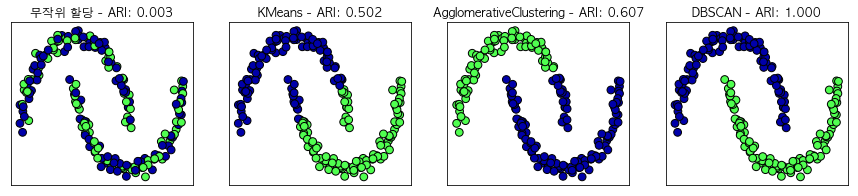

In [3]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('무작위 할당 - ARI: {:.3f}'.format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title('{} - ARI: {:.3f}'.format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

In [4]:
from sklearn.metrics import accuracy_score

clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

print('정확도: {:.3f}'.format(accuracy_score(clusters1, clusters2)))
print('ARI: {:.3f}'.format(adjusted_rand_score(clusters1, clusters2)))

정확도: 0.000
ARI: 1.000


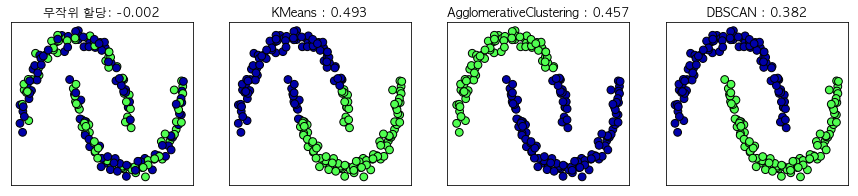

In [5]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('무작위 할당: {:.3f}'.format(silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title('{} : {:.3f}'.format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

In [6]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

In [7]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

In [11]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print('고유한 레이블: {}'.format(np.unique(labels)))

고유한 레이블: [-1]


In [13]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print('고유한 레이블: {}'.format(np.unique(labels)))

고유한 레이블: [-1]


In [14]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print('고유한 레이블: {}'.format(np.unique(labels)))

고유한 레이블: [-1  0]


In [15]:
print('클러스터별 포인트 수: {}'.format(np.bincount(labels + 1)))

클러스터별 포인트 수: [  32 2031]


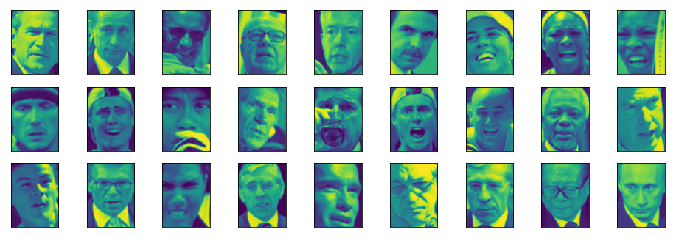

In [16]:
noise = X_people[labels == -1]

fig, axes = plt.subplots(3, 9, figsize=(12, 4), subplot_kw={'xticks': (), 'yticks': ()})
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [18]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print('\neps={}'.format(eps))
    dbscan = DBSCAN(min_samples=3, eps=eps)
    labels = dbscan.fit_predict(X_pca)
    print('클러스터 수: {}'.format(len(np.unique(labels))))
    print('클러스터 크기: {}'.format(np.bincount(labels + 1)))


eps=1
클러스터 수: 1
클러스터 크기: [2063]

eps=3
클러스터 수: 1
클러스터 크기: [2063]

eps=5
클러스터 수: 1
클러스터 크기: [2063]

eps=7
클러스터 수: 14
클러스터 크기: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps=9
클러스터 수: 4
클러스터 크기: [1307  750    3    3]

eps=11
클러스터 수: 2
클러스터 크기: [ 413 1650]

eps=13
클러스터 수: 2
클러스터 크기: [ 120 1943]


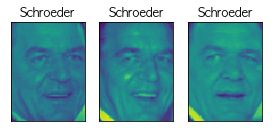

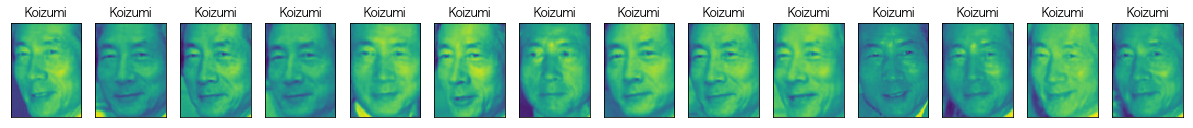

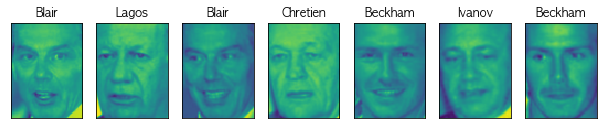

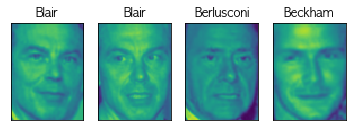

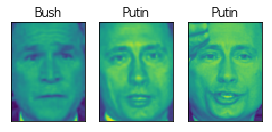

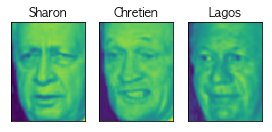

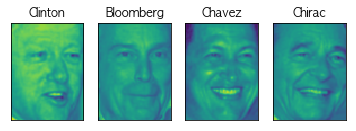

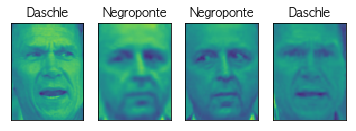

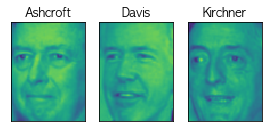

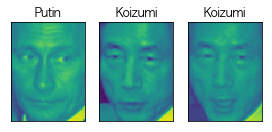

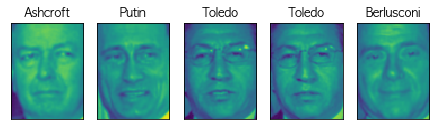

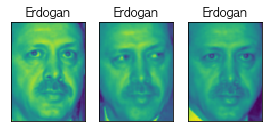

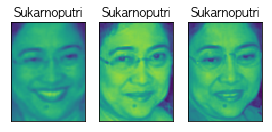

In [28]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images*1.5, 4), subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

In [29]:
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print('k-평균의 클러스터 크기: {}'.format(np.bincount(labels_km)))

k-평균의 클러스터 크기: [155 175 238  75 358 257  91 219 323 172]


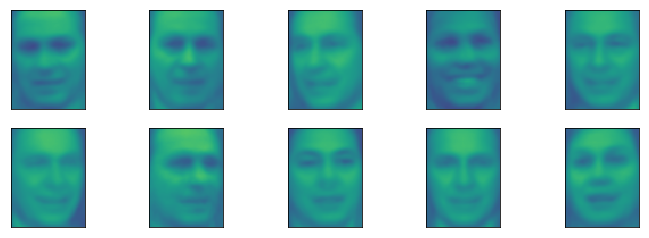

In [30]:
fig, axes = plt.subplots(2, 5, figsize=(12, 4), subplot_kw={'xticks': (), 'yticks': ()})
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)

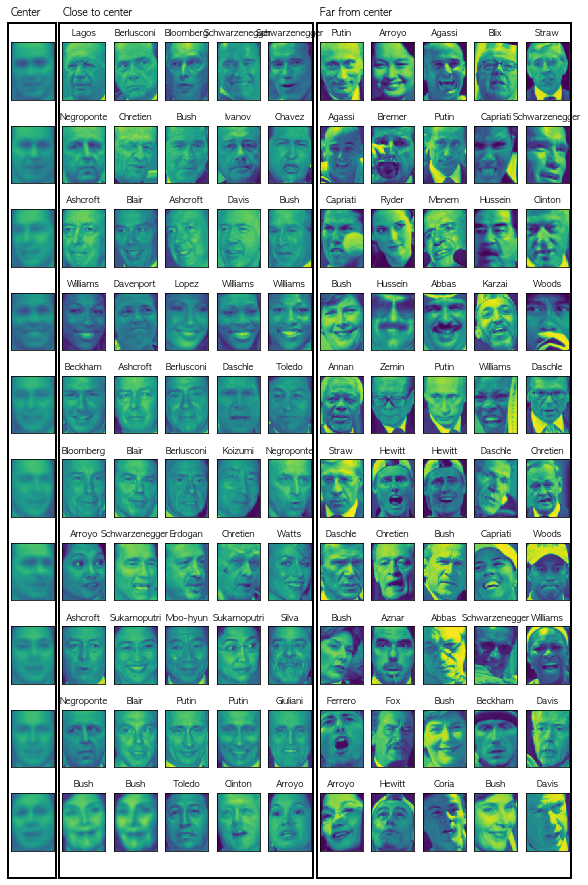

In [31]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)

In [33]:
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print('병합 군집의 클러스터 크기: {}'.format(np.bincount(labels_agg)))

병합 군집의 클러스터 크기: [169 660 144 329 217  85  18 261  31 149]


In [34]:
print('ARI: {:.3f}'.format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.087


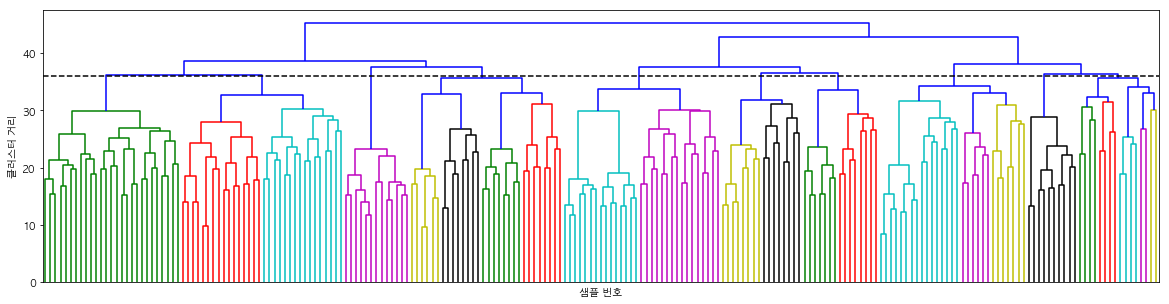

In [36]:
from scipy.cluster.hierarchy import dendrogram, ward

linkage_array = ward(X_pca)

plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel('샘플 번호')
plt.ylabel('클러스터 거리')
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [36, 36], '--', c='k')

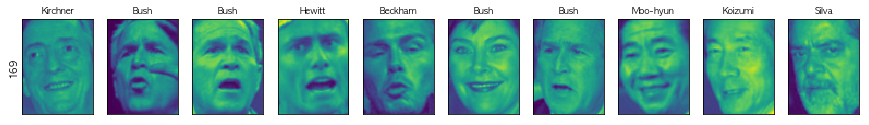

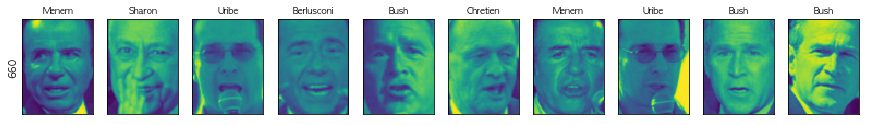

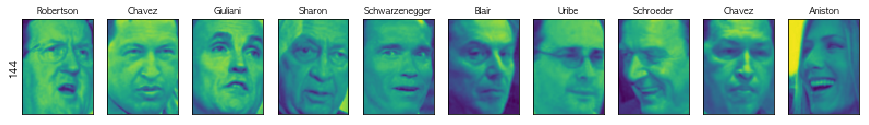

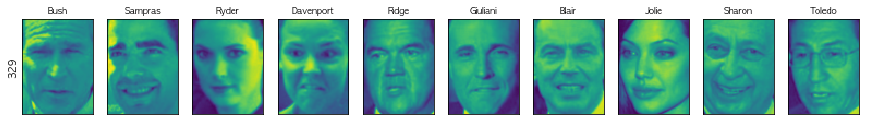

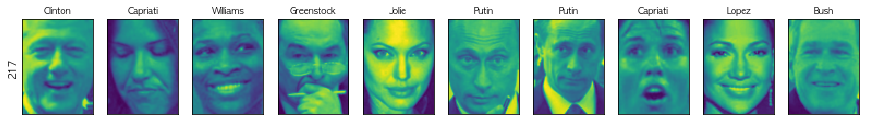

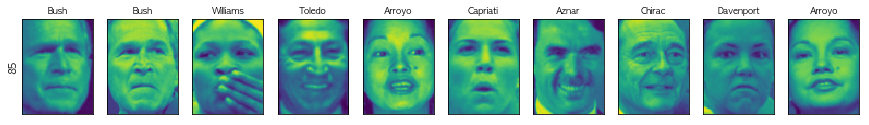

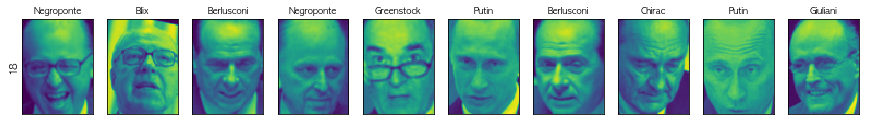

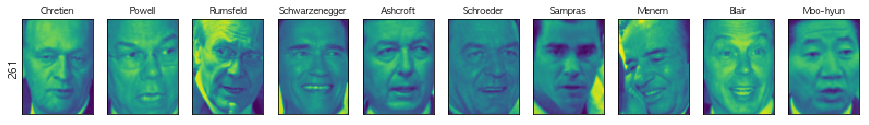

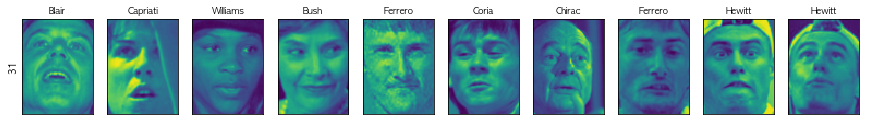

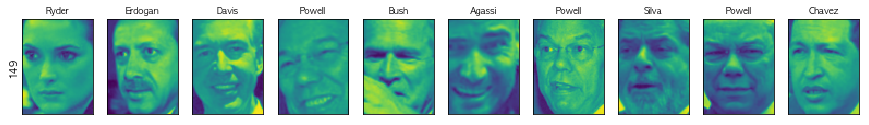

In [37]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, figsize=(15, 8), subplot_kw={'xticks':(), 'yticks': ()})
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})

병합 군집의 클러스터 크기: [ 43 120 100 194  56  58 127  22   6  37  65  49  84  18 168  44  47  31
  78  30 166  20  57  14  11  29  23   5   8  84  67  30  57  16  22  12
  29   2  26   8]


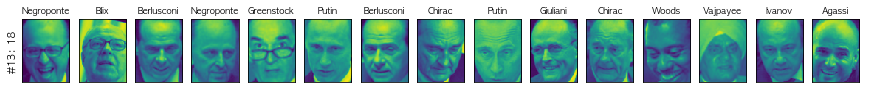

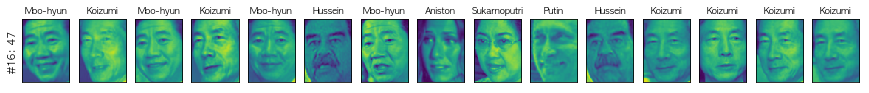

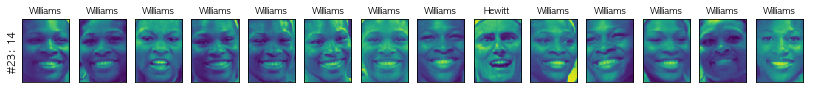

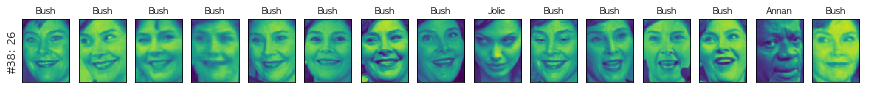

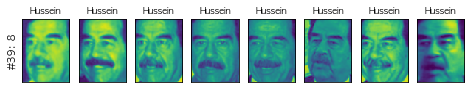

In [41]:
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print('병합 군집의 클러스터 크기: {}'.format(np.bincount(labels_agg)))

n_clusters = 40
for cluster in [13, 16, 23, 38, 39]:
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
    cluster_size = np.sum(mask)
    axes[0].set_ylabel('#{}: {}'.format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)